Dataset loaded successfully.
Cleaning dataset...
Dataset cleaned.
Preprocessing dataset...
Dataset preprocessed.
Visualizing time series data...


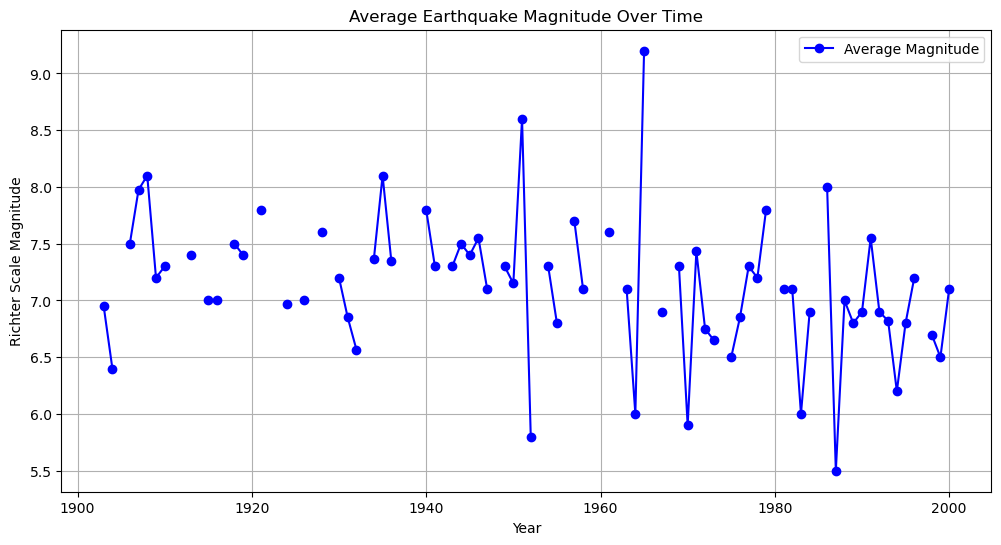

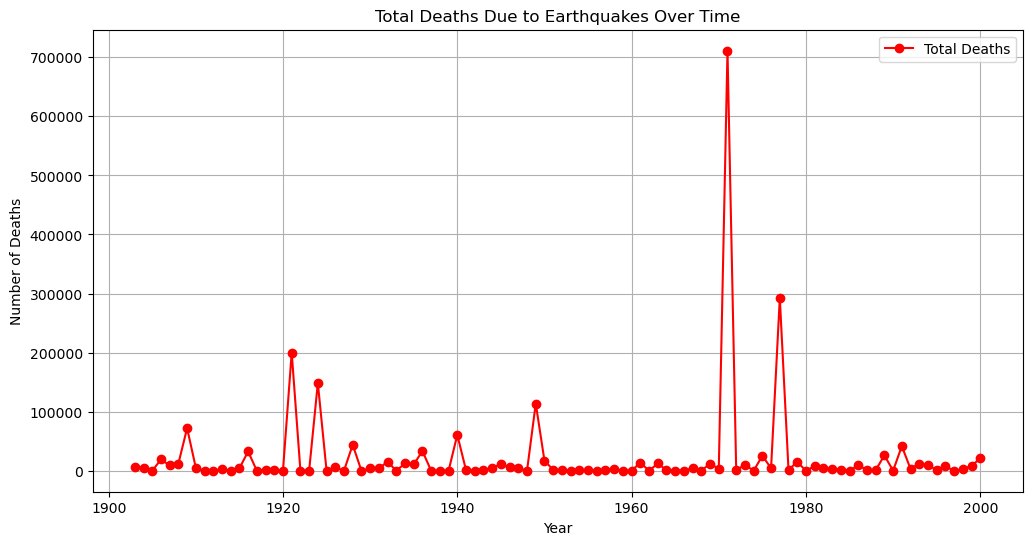

Performing seasonal decomposition...


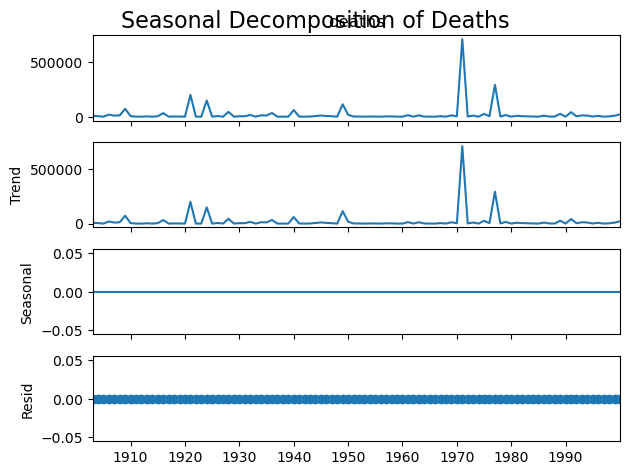

Processed dataset saved to 'processed_earthquake_data.csv'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to load dataset
def load_dataset(file_path):
    """
    Load a time series disaster dataset.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        DataFrame: Loaded dataset.
    """
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Function to clean dataset
def clean_dataset(data):
    """
    Clean the disaster dataset by handling missing values and duplicates.

    Args:
        data (DataFrame): Input dataset.

    Returns:
        DataFrame: Cleaned dataset.
    """
    print("Cleaning dataset...")

    # Combine 'year', 'month', and 'day' into a single 'date' column
    data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%B').month if isinstance(x, str) else x)
    data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
    data.drop(columns=['year', 'month', 'day'], inplace=True)

    # Handle missing values
    data['area'].fillna('Unknown', inplace=True)
    data['region'].fillna('Unknown', inplace=True)
    data['deaths'].fillna(data['deaths'].median(), inplace=True)

    # Remove duplicates
    data = data.drop_duplicates()

    # Sort by date
    data.sort_values(by='date', inplace=True)

    print("Dataset cleaned.")
    return data

# Function to preprocess time series data
def preprocess_timeseries(data):
    """
    Preprocess the disaster dataset by resampling and feature extraction.

    Args:
        data (DataFrame): Input dataset.

    Returns:
        DataFrame: Preprocessed dataset.
    """
    print("Preprocessing dataset...")

    # Resample to yearly data
    data_resampled = data.set_index('date').resample('Y').agg({
        'richter': 'mean',      # Average magnitude per year
        'deaths': 'sum',        # Total deaths per year
        'area': 'count',        # Count of events per year (proxy for frequency)
    }).rename(columns={'area': 'event_count'})

    # Add year as a separate column
    data_resampled['year'] = data_resampled.index.year

    print("Dataset preprocessed.")
    return data_resampled

# Function to visualize time series data
def visualize_time_series(data):
    """
    Generate time series visualizations including line plots and seasonal decomposition.

    Args:
        data (DataFrame): Preprocessed dataset.
    """
    print("Visualizing time series data...")

    # Line plot for earthquake magnitude over time
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['richter'], marker='o', label='Average Magnitude', color='blue')
    plt.title('Average Earthquake Magnitude Over Time')
    plt.xlabel('Year')
    plt.ylabel('Richter Scale Magnitude')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Line plot for deaths over time
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['deaths'], marker='o', label='Total Deaths', color='red')
    plt.title('Total Deaths Due to Earthquakes Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Seasonal decomposition for deaths
    print("Performing seasonal decomposition...")
    decomposition = seasonal_decompose(data['deaths'], model='additive', period=1)
    
    decomposition.plot()
    plt.suptitle('Seasonal Decomposition of Deaths', fontsize=16)
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Replace 'disaster_dataset.csv' with your file path
    file_path = 'earthquakes.csv'

    # Step 1: Load the dataset
    dataset = load_dataset(file_path)

    if dataset is not None:
        # Step 2: Clean the dataset
        cleaned_data = clean_dataset(dataset)

        # Step 3: Preprocess the dataset
        preprocessed_data = preprocess_timeseries(cleaned_data)

        # Step 4: Visualize the time series data
        visualize_time_series(preprocessed_data)

        # Save the preprocessed dataset
        preprocessed_data.to_csv('processed_earthquake_data.csv')
        print("Processed dataset saved to 'processed_earthquake_data.csv'.")
